### Target:
    
    - Getting a working setup with modular code. We will use assignment 5 code.

    - Model.py has models and utils.py has train, test and plotting functions.

### Results:

    - Model has 5.9M parameters.

    - Train Accuracy = 99.94

    - Test Accuracy = 99.34

### Analysis:

    - Our setup is running correctly.

    - Model is very large and overfitting

    - Closer look at images tell us that a receptive field of 5 pixels is enough to catch edges.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

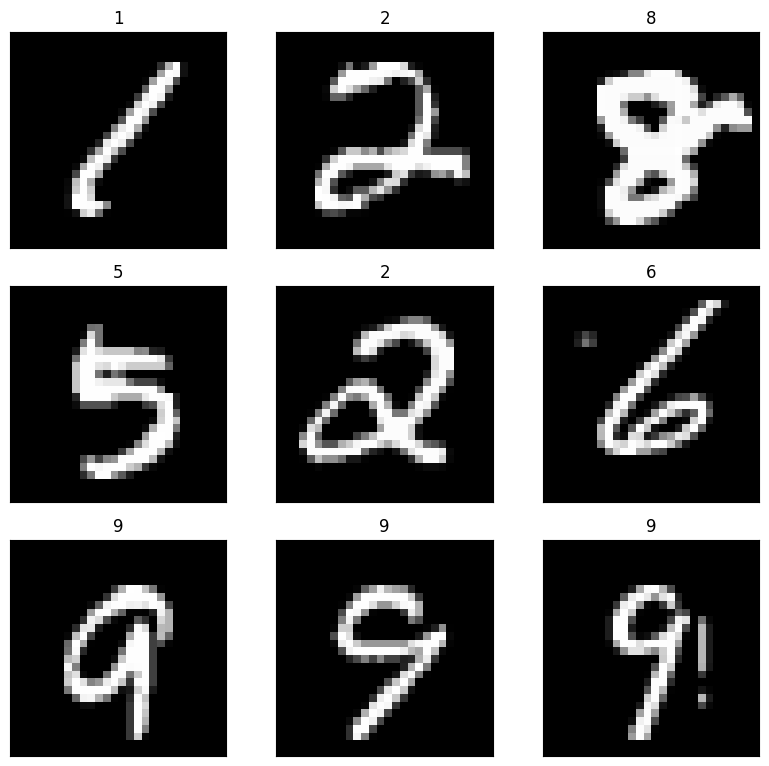

In [7]:
from utils import show_examples
show_examples(train_loader, figsize=(8, 8))

In [8]:
from model import Model_1 as Net

model = Net().to(device)
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model_1                                  [64, 1, 28, 28]           [64, 10]                  --                             --
├─Conv2d: 1-1                            [64, 1, 28, 28]           [64, 32, 26, 26]          320                         0.05%
├─Conv2d: 1-2                            [64, 32, 26, 26]          [64, 64, 24, 24]          18,496                      3.12%
├─Conv2d: 1-3                            [64, 64, 12, 12]          [64, 128, 10, 10]         73,856                     12.45%
├─Conv2d: 1-4                            [64, 128, 10, 10]         [64, 256, 8, 8]           295,168                    49.76%
├─Linear: 1-5                            [64, 4096]                [64, 50]                  204,850                    34.53%
├─Linear: 1-6                            [64, 50]                  [64, 10]                  510               

In [9]:
from utils import train, test

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0121 Batch_id=937 Average Loss=0.2472 Accuracy=91.94: 100%|██████████| 938/938 [00:32<00:00, 28.56it/s]


Test set: Average loss: 0.0522, Accuracy: 9815/10000 (98.15%)

Epoch 2


Train: Batch Loss=0.0207 Batch_id=937 Average Loss=0.0479 Accuracy=98.51: 100%|██████████| 938/938 [00:32<00:00, 29.04it/s]


Test set: Average loss: 0.0358, Accuracy: 9877/10000 (98.77%)

Epoch 3


Train: Batch Loss=0.0138 Batch_id=937 Average Loss=0.0300 Accuracy=99.05: 100%|██████████| 938/938 [00:31<00:00, 29.57it/s]


Test set: Average loss: 0.0343, Accuracy: 9886/10000 (98.86%)

Epoch 4


Train: Batch Loss=0.0199 Batch_id=937 Average Loss=0.0229 Accuracy=99.28: 100%|██████████| 938/938 [00:31<00:00, 29.71it/s]


Test set: Average loss: 0.0264, Accuracy: 9913/10000 (99.13%)

Epoch 5


Train: Batch Loss=0.0022 Batch_id=937 Average Loss=0.0173 Accuracy=99.47: 100%|██████████| 938/938 [00:31<00:00, 29.56it/s]


Test set: Average loss: 0.0219, Accuracy: 9929/10000 (99.29%)

Epoch 6


Train: Batch Loss=0.0008 Batch_id=937 Average Loss=0.0122 Accuracy=99.61: 100%|██████████| 938/938 [00:34<00:00, 27.43it/s]


Test set: Average loss: 0.0214, Accuracy: 9929/10000 (99.29%)

Epoch 7


Train: Batch Loss=0.0001 Batch_id=937 Average Loss=0.0095 Accuracy=99.71: 100%|██████████| 938/938 [00:32<00:00, 29.00it/s]


Test set: Average loss: 0.0238, Accuracy: 9927/10000 (99.27%)

Epoch 8


Train: Batch Loss=0.0067 Batch_id=937 Average Loss=0.0094 Accuracy=99.71: 100%|██████████| 938/938 [00:32<00:00, 28.98it/s]


Test set: Average loss: 0.0258, Accuracy: 9912/10000 (99.12%)

Epoch 9


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0061 Accuracy=99.80: 100%|██████████| 938/938 [00:32<00:00, 28.87it/s]


Test set: Average loss: 0.0299, Accuracy: 9909/10000 (99.09%)

Epoch 10


Train: Batch Loss=0.0100 Batch_id=937 Average Loss=0.0058 Accuracy=99.81: 100%|██████████| 938/938 [00:32<00:00, 28.67it/s]


Test set: Average loss: 0.0369, Accuracy: 9907/10000 (99.07%)

Epoch 11


Train: Batch Loss=0.0002 Batch_id=937 Average Loss=0.0059 Accuracy=99.83: 100%|██████████| 938/938 [00:34<00:00, 27.39it/s]


Test set: Average loss: 0.0287, Accuracy: 9921/10000 (99.21%)

Epoch 12


Train: Batch Loss=0.0006 Batch_id=937 Average Loss=0.0040 Accuracy=99.86: 100%|██████████| 938/938 [00:32<00:00, 28.57it/s]


Test set: Average loss: 0.0361, Accuracy: 9901/10000 (99.01%)

Epoch 13


Train: Batch Loss=0.0002 Batch_id=937 Average Loss=0.0032 Accuracy=99.89: 100%|██████████| 938/938 [00:34<00:00, 27.15it/s]


Test set: Average loss: 0.0300, Accuracy: 9919/10000 (99.19%)

Epoch 14


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0023 Accuracy=99.92: 100%|██████████| 938/938 [00:32<00:00, 28.69it/s]


Test set: Average loss: 0.0296, Accuracy: 9915/10000 (99.15%)

Epoch 15


Train: Batch Loss=0.0001 Batch_id=937 Average Loss=0.0018 Accuracy=99.94: 100%|██████████| 938/938 [00:32<00:00, 28.61it/s]


Test set: Average loss: 0.0282, Accuracy: 9934/10000 (99.34%)



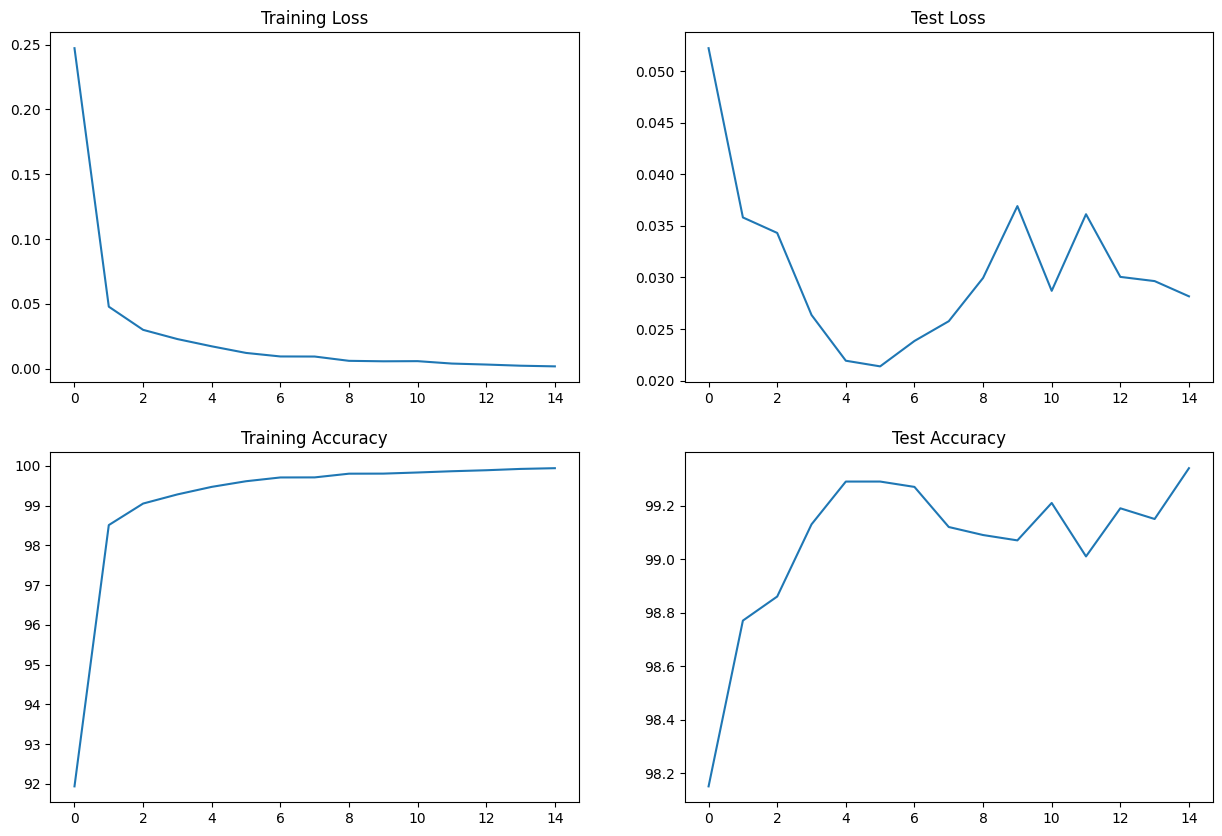

In [11]:
from utils import plot_stats
plot_stats()

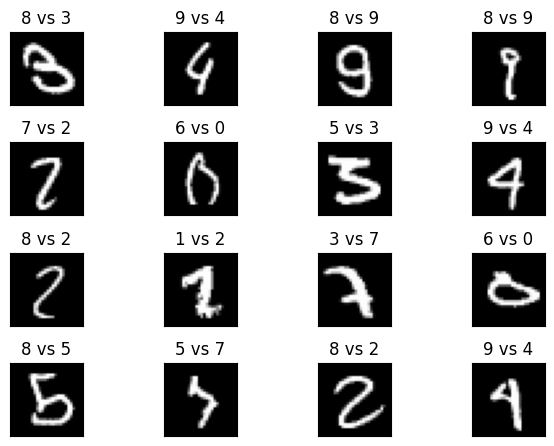

In [12]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual